## plot_era5.ipynb
Author: Robert M. Frost

University of Oklahoma

Created 08 September 2023

Purpose: Plot ERA5 data to gain synoptic overview of simulated event

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import cartopy.crs as ccrs
import cartopy.feature as cpf
import cmocean
import seaborn
from datetime import datetime

In [20]:
pl = xr.open_dataset("/home/robbyfrost/era5/ERA5-20070817-20070821-pl.nc")
sl = xr.open_dataset("/home/robbyfrost/era5/ERA5-20070817-20070821-sl.nc")

In [21]:
plev = pl.level
lat, lon = pl.latitude, pl.longitude
time = pl.time

In [22]:
# time indice to plot
time_idx = 19

# time to string
time_str1 = str(time[time_idx].values)
time_str2 = time_str1[:10]
time_str3 = time_str1[11:19]
time_str = time_str2 + " " + time_str3 + " UTC"

In [23]:
# calculate geopotential height
pl["gh"] = (pl.z / 9.81)
# m/s to knots
pl["u"] = pl.u * 1.944
pl["v"] = pl.v * 1.944
# wspd
pl["wspd"] = (pl.u ** 2 + pl.v ** 2) ** (1/2)

In [24]:
mb925 = pl.where(plev == 925, drop=True)
mb850 = pl.where(plev == 850, drop=True)
mb700 = pl.where(plev == 700, drop=True)
mb500 = pl.where(plev == 500, drop=True)
mb300 = pl.where(plev == 300, drop=True)
mb250 = pl.where(plev == 250, drop=True)

In [25]:
pwat = sl.tcwv

In [26]:
rc('font',weight='normal',size=15)

## Plot 250 mb

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

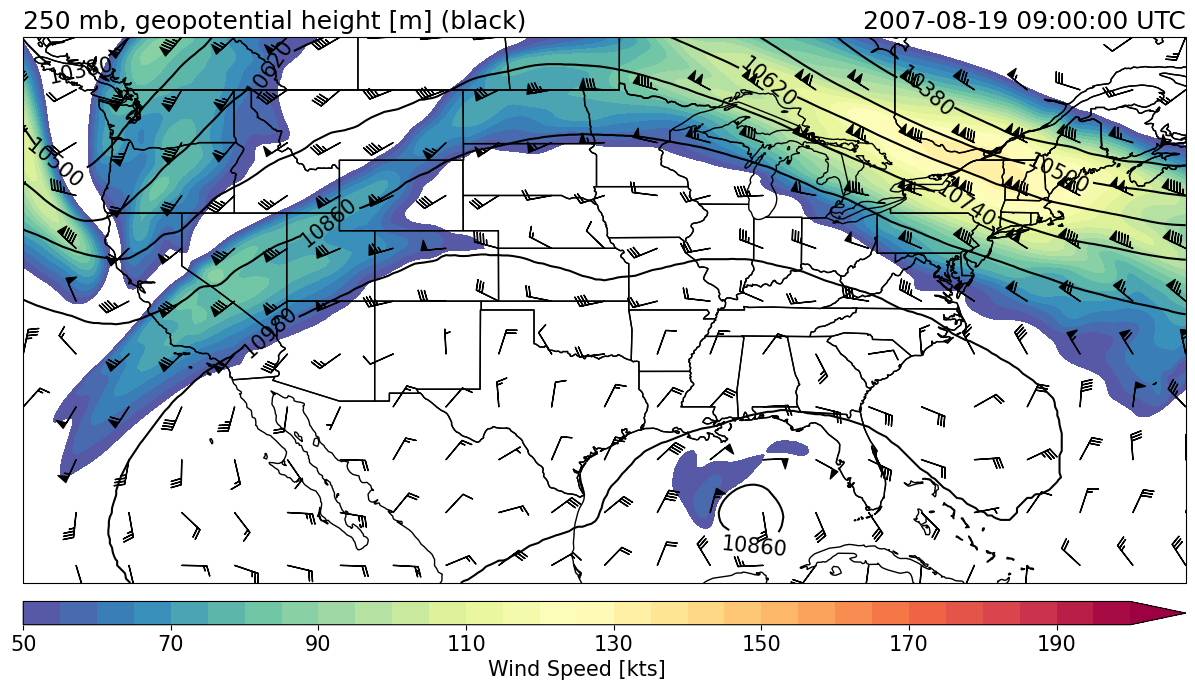

In [27]:
# geopotential height contours, wind barbs, and wind speed

clevs_gh = np.arange(10380, 11101, 120)
clevs_wspd = np.arange(50, 201, 5)

fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb250.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb250.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 12 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb250.u[time_idx,0,::spacing,::spacing], mb250.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title("250 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

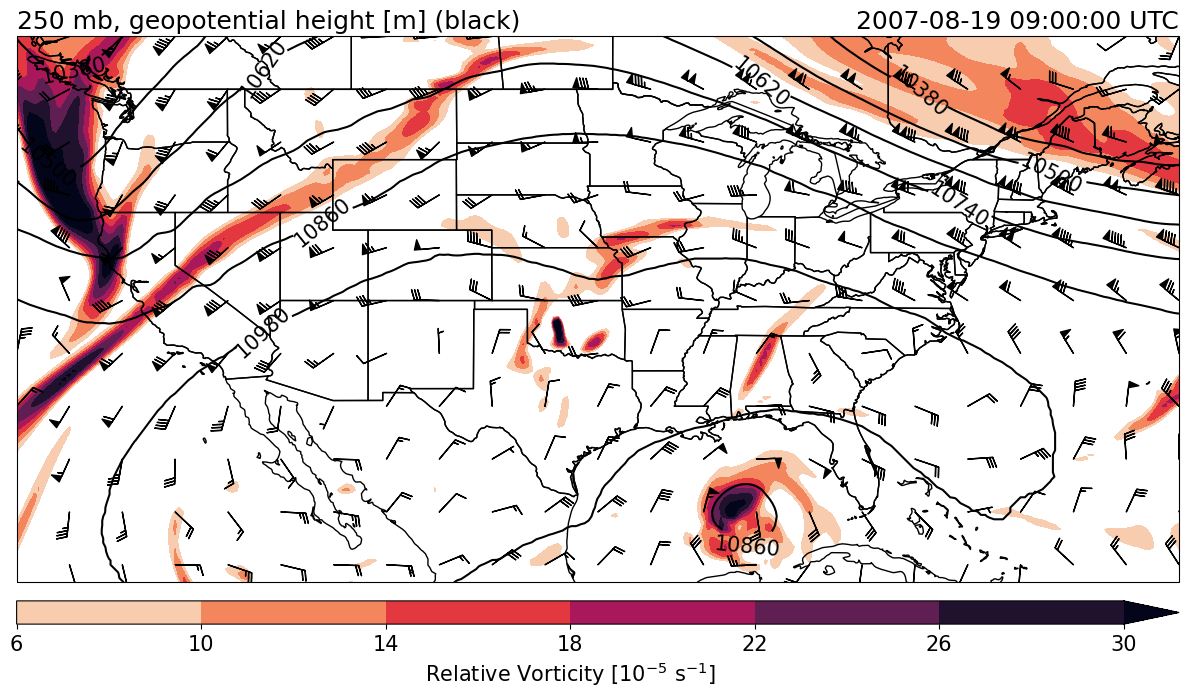

In [28]:
# geopotential height contours, wind barbs, and relative vorticity

# levels to be plot
clevs_gh = np.arange(10380, 11101, 120)
clevs_vo = np.arange(6, 32.1, 4)

# create figure
fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# contour heights
contour_plot = ax.contour(lon, lat, mb250.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contour_label = plt.clabel(contour_plot)
# contour fill vorticity
contourf_plot = ax.contourf(lon, lat, mb250.vo[time_idx,0] * 10**5, clevs_vo,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("rocket_r", as_cmap=True))

# colorbar
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Relative Vorticity [10$^{-5}$ s$^{-1}$]")

# mapping
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 12 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb250.u[time_idx,0,::spacing,::spacing], mb250.v[time_idx,0,::spacing,::spacing], 
            length=6)

# titles
ax.set_title("250 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

## Plot 500 mb

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

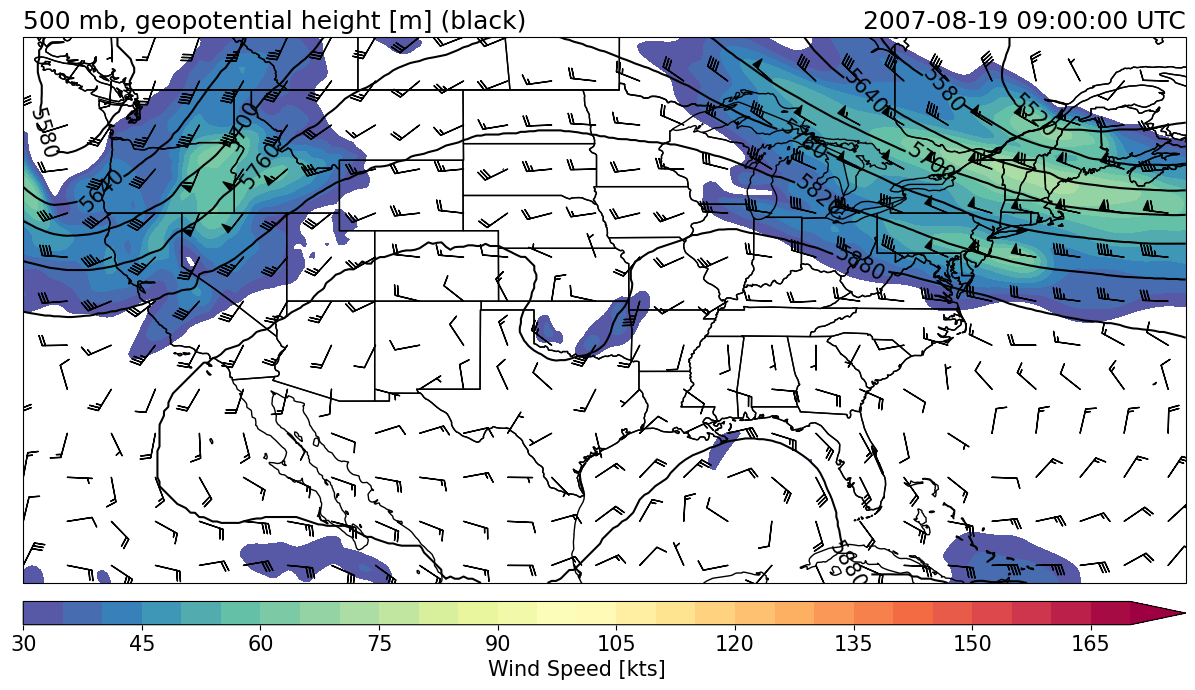

In [29]:
# geopotential height contours, wind barbs, and wind speed

time_idx = 19 #index of time of interest

clevs_gh = np.arange(5400, 6000, 60)
clevs_wspd = np.arange(30, 171, 5)

fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb500.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb500.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb500.u[time_idx,0,::spacing,::spacing], mb500.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title("500 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

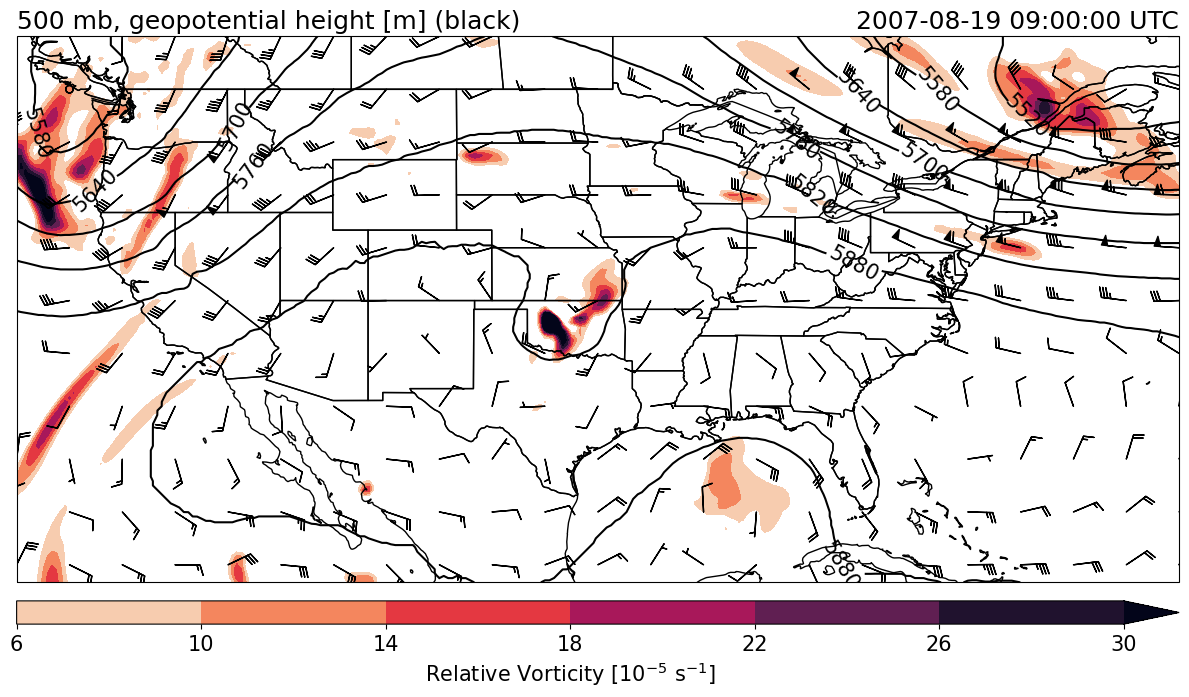

In [30]:
# geopotential height contours, wind barbs, and relative vorticity

# levels to be plot
clevs_gh = np.arange(5400, 6000, 60)
clevs_vo = np.arange(6, 32.1, 4)

# create figure
fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# contour heights
contour_plot = ax.contour(lon, lat, mb500.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contour_label = plt.clabel(contour_plot)
# contour fill vorticity
contourf_plot = ax.contourf(lon, lat, mb500.vo[time_idx,0] * 10**5, clevs_vo,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("rocket_r", as_cmap=True))

# colorbar
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Relative Vorticity [10$^{-5}$ s$^{-1}$]")

# mapping
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 12 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb500.u[time_idx,0,::spacing,::spacing], 
            mb500.v[time_idx,0,::spacing,::spacing], 
            length=6)

# titles
ax.set_title("500 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

## Plot 700 mb

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

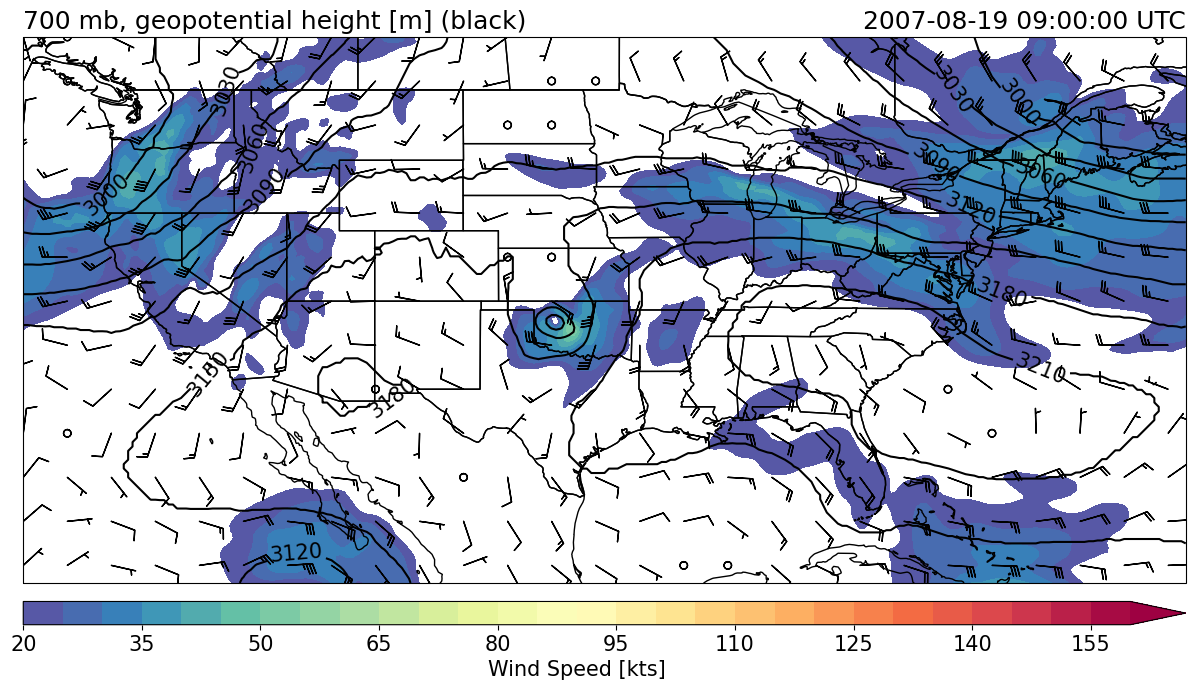

In [31]:
# geopotential height contours, wind barbs, and wind speed

clevs_gh = np.arange(3000, 3990, 30)
clevs_wspd = np.arange(20, 161, 5)

fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb700.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb700.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb700.u[time_idx,0,::spacing,::spacing], 
            mb700.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title("700 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

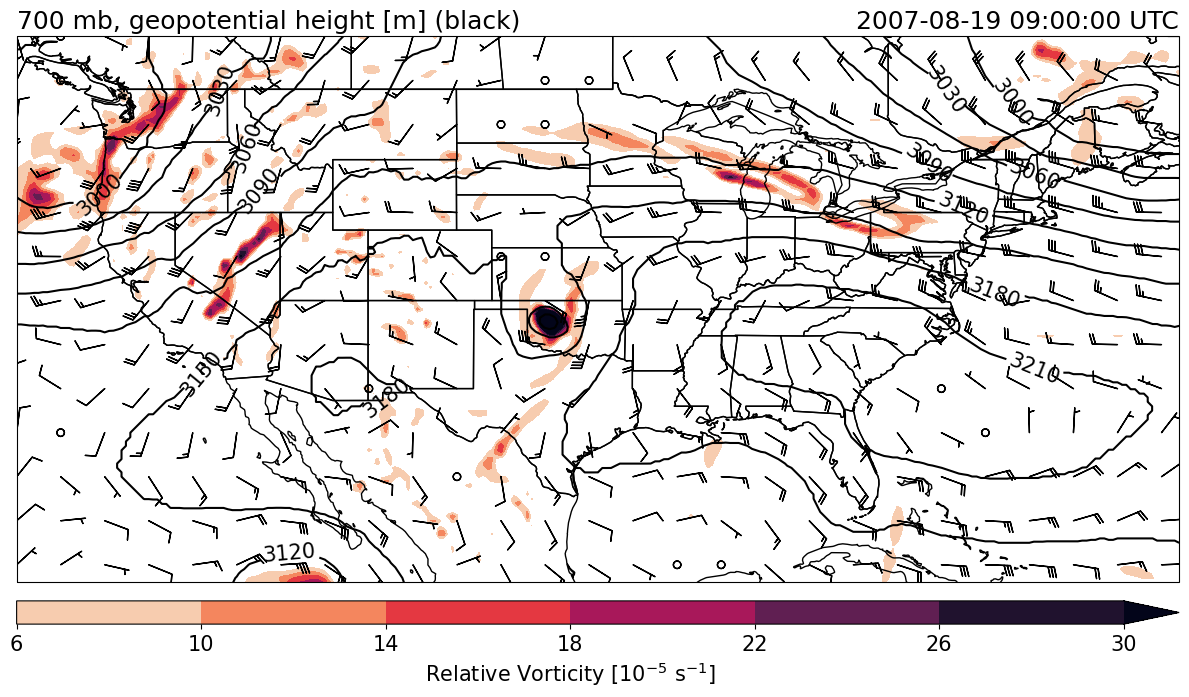

In [32]:
# geopotential height contours, wind barbs, and relative vorticity

# levels to be plot
clevs_gh = np.arange(3000, 3990, 30)
clevs_vo = np.arange(6, 32.1, 4)

# create figure
fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# contour heights
contour_plot = ax.contour(lon, lat, mb700.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contour_label = plt.clabel(contour_plot)
# contour fill vorticity
contourf_plot = ax.contourf(lon, lat, mb700.vo[time_idx,0] * 10**5, clevs_vo,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("rocket_r", as_cmap=True))

# colorbar
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Relative Vorticity [10$^{-5}$ s$^{-1}$]")

# mapping
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb700.u[time_idx,0,::spacing,::spacing], 
            mb700.v[time_idx,0,::spacing,::spacing], 
            length=6)

# titles
ax.set_title("700 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

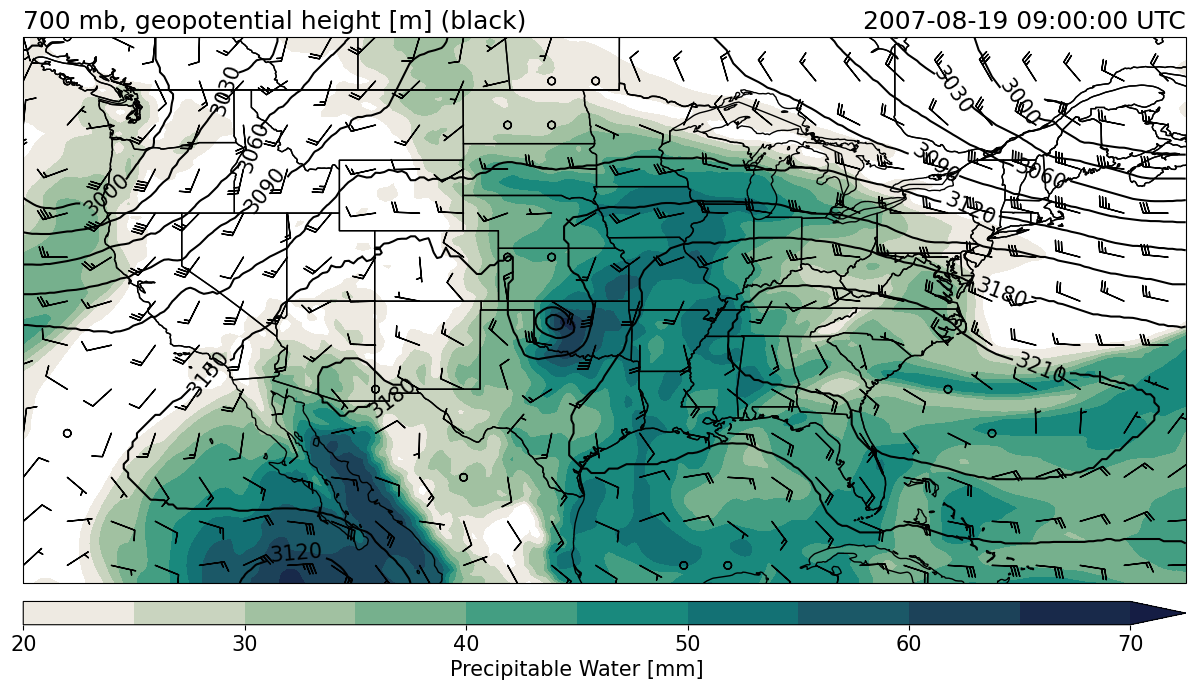

In [33]:
# geopotential height contours, wind barbs, and precipitable water

# levels to be plot
clevs_gh = np.arange(3000, 3990, 30)
clevs_pw = np.arange(20, 70.1, 5)

# create figure
fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# contour heights
contour_plot = ax.contour(lon, lat, mb700.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contour_label = plt.clabel(contour_plot)
# contour fill vorticity
contourf_plot = ax.contourf(lon, lat, pwat[time_idx], clevs_pw,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=cmocean.cm.tempo)

# colorbar
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Precipitable Water [mm]")

# mapping
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb700.u[time_idx,0,::spacing,::spacing], 
            mb700.v[time_idx,0,::spacing,::spacing], 
            length=6)

# titles
ax.set_title("700 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

## 850 mb

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

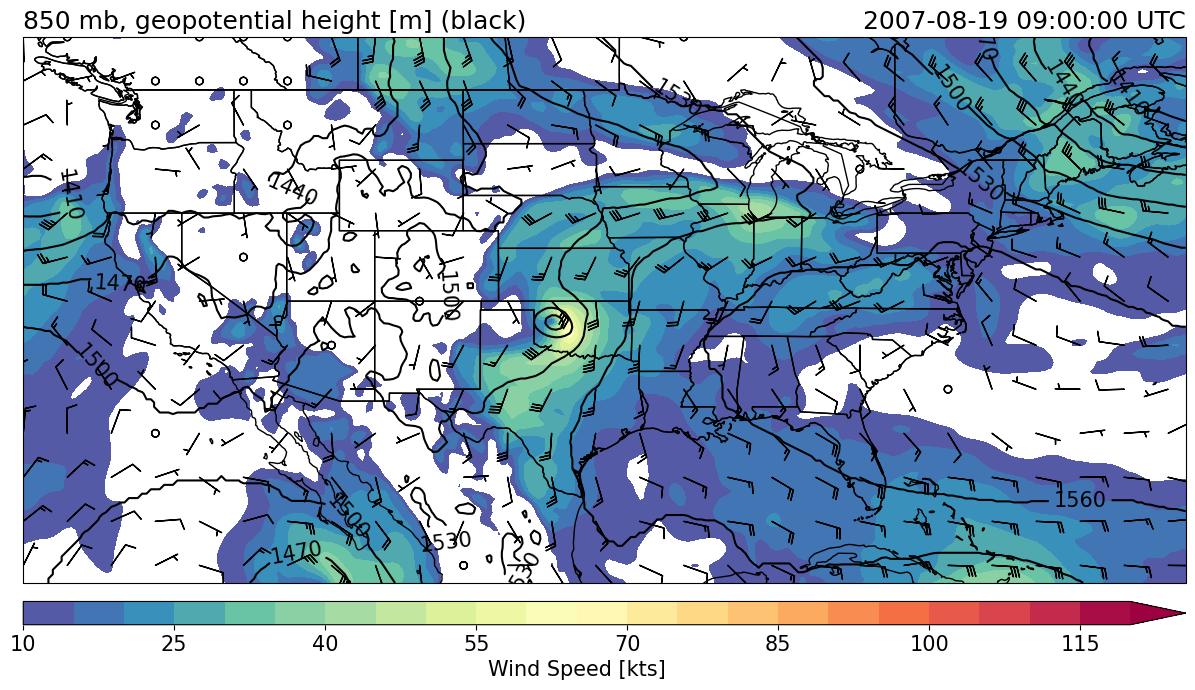

In [34]:
# geopotential height contours, wind barbs, and wind speed

clevs_gh = np.arange(1410, 1590, 30)
clevs_wspd = np.arange(10, 121, 5)

fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb850.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb850.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb850.u[time_idx,0,::spacing,::spacing], mb850.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title("850 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

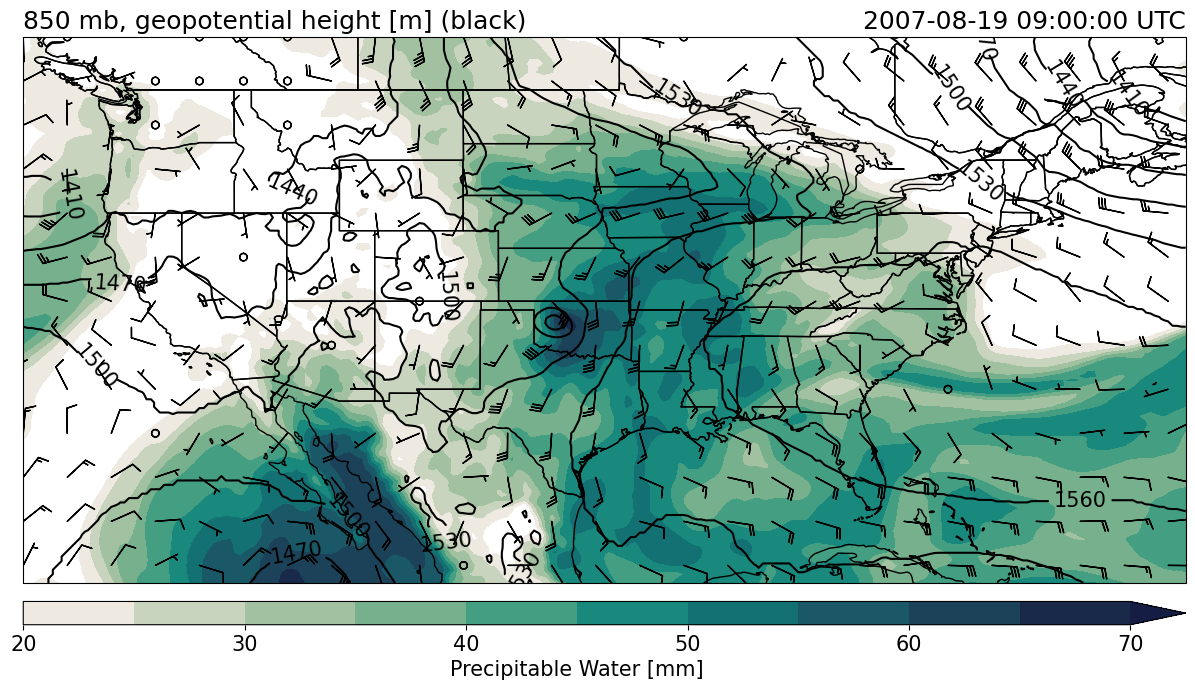

In [35]:
# geopotential height contours, wind barbs, and precipitable water

# levels to be plot
clevs_gh = np.arange(1410, 1590, 30)
clevs_pw = np.arange(20, 70.1, 5)

# create figure
fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# contour heights
contour_plot = ax.contour(lon, lat, mb850.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contour_label = plt.clabel(contour_plot)
# contour fill vorticity
contourf_plot = ax.contourf(lon, lat, pwat[time_idx], clevs_pw,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=cmocean.cm.tempo)

# colorbar
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Precipitable Water [mm]")

# mapping
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb850.u[time_idx,0,::spacing,::spacing], 
            mb850.v[time_idx,0,::spacing,::spacing], 
            length=6)

# titles
ax.set_title("850 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")

## 925 mb

Text(1.0, 1.0, '2007-08-19 09:00:00 UTC')

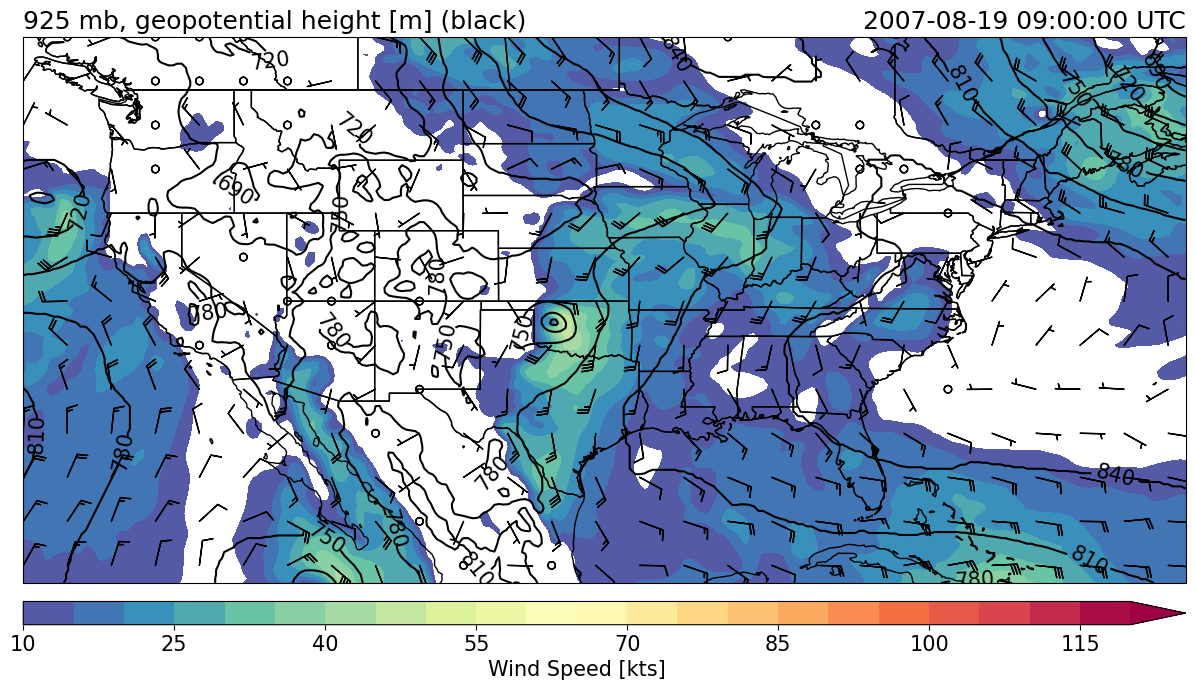

In [36]:
# geopotential height contours, wind barbs, and wind speed

clevs_gh = np.arange(690, 841, 30)
clevs_wspd = np.arange(10, 121, 5)

fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb925.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb925.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb925.u[time_idx,0,::spacing,::spacing], 
            mb925.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title("925 mb, geopotential height [m] (black)", loc="left")
ax.set_title(time_str, loc="right")